# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
import os
import numpy as np
import cv2

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
def import_Dataset(PATH):
    Dirs = os.listdir(PATH)
    img_list= []
    labels = []
    # Accessing Each folder..
    for Dir in Dirs:
        if(Dir == ".DS_Store"):
            continue
        images = os.listdir(PATH + Dir)
        imgs = []
        # storing all the images inside the folder..
        for image in images:
            img = cv2.imread(PATH + Dir + '/' + image ,cv2.IMREAD_GRAYSCALE )
            imgs.append(img)
        # storing the lables of respected images..
        labels.append(Dir)
        img_list.append(imgs)
    return img_list,labels
# importing Dataset from ATnT folder...
X,Y=import_Dataset('ATnT/')
X=np.array(X)
Y=np.array(Y)
print(X.shape)
print(Y.shape)

(40, 10, 112, 92)
(40,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

#### PCA Method :

*1. Standardization:* First, the dataset is standardized to ensure that all variables have the same scale. This involves subtracting the mean from each variable .

*2. Covariance matrix:* Next, the covariance matrix is calculated, which represents the relationships between each pair of variables in the dataset.

*3.Eigen decomposition:* The covariance matrix is then decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the directions of maximum variation in the dataset, and the corresponding eigenvalues represent the amount of variation explained by each eigenvector.

*4.Dimensionality reduction:* Finally, the dataset can be reduced to a smaller number of dimensions by selecting the top k principal components, where k is the desired number of dimensions. The original dataset can then be projected onto this lower-dimensional space using the selected principal components.



In [3]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_compoonents):
    # calculating mean of X.
    mean=np.mean(X , axis = 0)
    
    # subtracting mean from X.
    X = X - mean
    
    # Claculating coveriance matrix.
    covariance_matrix = np.cov(X , rowvar = False)
     # getting eigen values and eigen vectors..
    eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    # sorting and arranging eigen vectors..
    evectors_sorted = eigen_vectors[:,::-1]
    # getting top n components.
    evectors_sorted=evectors_sorted[:,:number_of_compoonents]
    
    
    return evectors_sorted, mean

In [4]:
dimensions=[X.shape[0], X.shape[1], X.shape[2], X.shape[3]]

# converting 4D matrix into 2D matrix..
X_data = X.reshape(dimensions[0]*dimensions[1],dimensions[2]*dimensions[3])
print(X_data.shape)


(400, 10304)


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

### Image Reconstruction Method :

*1. Reshaping:*  Collect a set of images and convert them into a matrix format. Each row of the matrix represents a flattened image.

*2. Mean Subtraction:* Subtract the mean image from each image to center the dataset. The mean image can be computed by taking the mean across each column of the matrix.

*3. Obtaining LD Representation:* Project each image onto the selected principal components to obtain a lower dimensional representation. This can be done by multiplying the centered image matrix with the selected eigenvectors.

*4. Reconstruction:* Reconstruct each image from the lower dimensional representation by multiplying the lower dimensional representation with the transpose of the selected eigenvectors.

*5.Mean Addition:* Add back the mean image to each reconstructed image to obtain the final reconstructed image.

In [5]:
# Function to implement image reconstruction by taking arguements as necessary.
import matplotlib.pyplot as plt

def imageReconstruction( x_data , Eigen_faces , mean):
    # subtracting mean from x
    x_data= x_data - mean
    
    # matrix multiplication of x and eigen faces
    x_data=np.dot(x_data,Eigen_faces)
    
    # matrix multiplication of x and transpose of eigen faces
    x_data=np.dot(x_data,Eigen_faces.transpose())
    
    # adding mean to x that was subtracted before..
    x_data_mean=x_data+mean
    
    return x_data_mean

def show_images(images,label):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(label)
    plt.show()

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

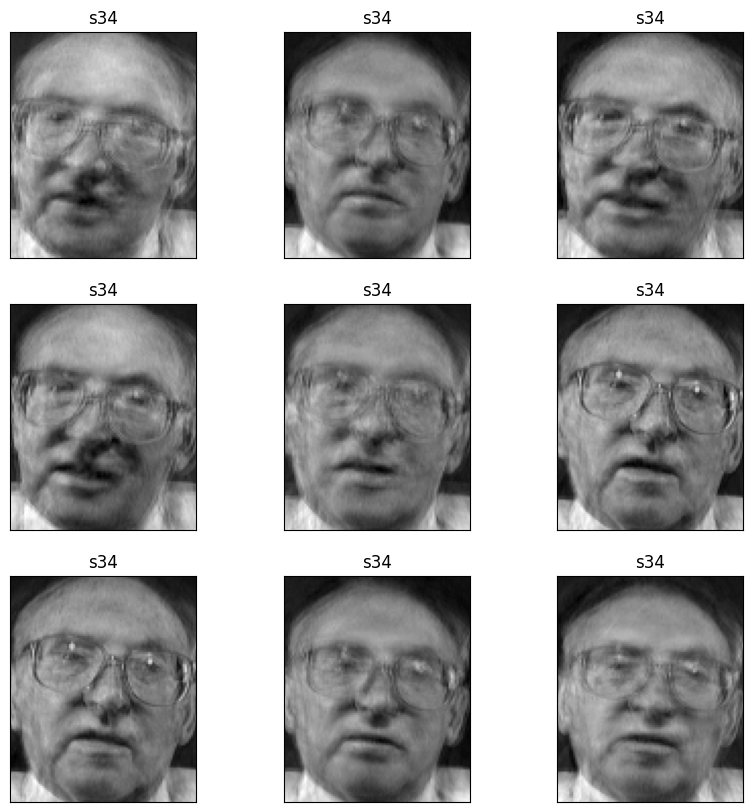

In [6]:
# getting top d eigen vectors..


Eigen_faces, mean=principalComponentAnalysis(X_data,100)

x_images=imageReconstruction(X_data,Eigen_faces , mean)

# converting 4D matrix from 2D
images=x_images.reshape(dimensions[0],dimensions[1],dimensions[2],dimensions[3])

#print all the images..
show_images(images[0],Y[0])

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [7]:
def split_train_test(x,y,test_size):
    n=int(x.shape[1]*test_size) # for test
    m=x.shape[1]-n   # for train
    
    # storing first m vectors into x_train
    x_train=x[:,:m]
    
    # storing last n vectors into x_test
    x_test=x[:,m:]
    y_train=y[:m]
    y_test=y[m:]
    return x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=split_train_test(X,Y,0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 9, 112, 92)
(40, 1, 112, 92)
(9,)
(31,)


In [8]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
# Method to return accuracy of two vectors.

def accuracy(y_test, y_pred):
    count=0
    for i in range(y_test.shape[0]):
        if(y_test[i] == y_pred[i]):
            count=count+1
            
    # Calculating accuracy.
    acc=count/len(y_test)
    return acc

def get_error(x,y):
    
    # Calculating mean error value bitween x and y. 
    error=np.mean(np.sum((x-y)**2))
    
    return error

def model(x_train,x_test,labels,eigen_faces):
    # Storing the dimensions of x_train.
    dim=[x_train.shape[0],x_train.shape[1],x_train.shape[2],x_train.shape[3]]
    # Storing the dimensions of x_test.
    dim_test=[x_test.shape[0],x_test.shape[1],x_test.shape[2],x_test.shape[3]] 
    
    #Converting x_train into 2D.
    x_train=x_train.reshape(dim[0]*dim[1],dim[2]*dim[3])
    #Converting x_test into 2D.
    x_test=x_test.reshape(dim_test[0]*dim_test[1],dim_test[2]*dim_test[3])
    
    #performing dotproduct bitween x_train and eigen faces.
    x_train=np.dot(x_train,eigen_faces)
    x_test=np.dot(x_test,eigen_faces)
    images = []
    error_values = []
    Pred_classes = []
    
    # calculating mean error for each test image with all the train images.
    for test in range(x_test.shape[0]):
        min_err=np.inf
        min_img=-1
        min_label=-1
        for train in range(x_train.shape[0]):
            error=get_error(x_test[test],x_train[train])
            if(min_err>error):
                min_err = error
                min_img = x_train[train]
                min_label = labels[train // dim[1]]
                
        # stroing the image and predicted class of train with min error.
        images.append(min_img)
        error_values.append(min_err)
        Pred_classes.append(min_label)
        
    return np.array(images),np.array(error_values), np.array(Pred_classes)


In [9]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
# storing the dimensions of x_train for future purpose.
dimensions=[x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3]]

# Reshaping x_train into 2D.
x_train_reshaped = x_train.reshape(dimensions[0]*dimensions[1],dimensions[2]*dimensions[3])

# Getting eigen vectors and mean from pca and model the x_test .
eigen_faces, mean=principalComponentAnalysis(x_train_reshaped,100)

images,error_values,Pred_classes=model(x_train,x_test,Y,eigen_faces)

print("Accuracy : ",accuracy(Y, Pred_classes))

Accuracy :  0.95


In [10]:
# expanding the dimension by doing dot product of return images with eigen vector.
images_proc=np.dot(images,eigen_faces.transpose())
images_mean=images_proc+mean
print(images_mean.shape , eigen_faces.shape,mean)

# reconstructing  images.
x_images=imageReconstruction(images_mean,eigen_faces , mean)

# Reshaping images into 4D to show images.
dimensions=[x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3]]
images_show=x_images.reshape(dimensions[0],dimensions[1],dimensions[2],dimensions[3])


(40, 10304) (10304, 100) [85.45555556 85.38888889 85.75277778 ... 76.53333333 75.70555556
 74.66944444]


(40, 1, 112, 92) (40,)


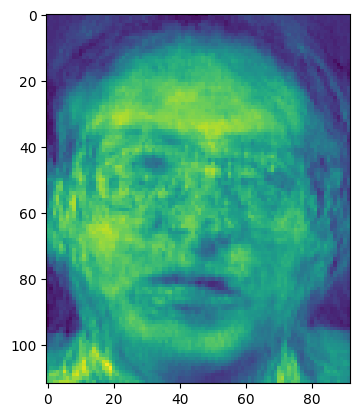

In [11]:
print(images_show.shape,Y.shape)
plt.imshow(images_show[0][0])

In [12]:
# Visualization with different dimensions.
dim_x=np.array([ 5 , 10 , 50 , 100 , 1000 , 2000 ])
mse_values=[]
mse_log_values=[]

# Calculating mse for each dimensions.
for d in range(dim_x.shape[0]):
    eigen_faces, mean=principalComponentAnalysis(x_train_reshaped,dim_x[d])
    
    images,error_values,Pred_classes=model(x_train,x_test,Y,eigen_faces)
    # Claculating meas square error value.
    mse = np.mean(error_values) / dim_x[d]
    
    # Calculating Logarithmic Mean Square Error value.
    mse_log=np.log(mse)
    mse_log_values.append(mse_log)
    mse_values.append(mse)


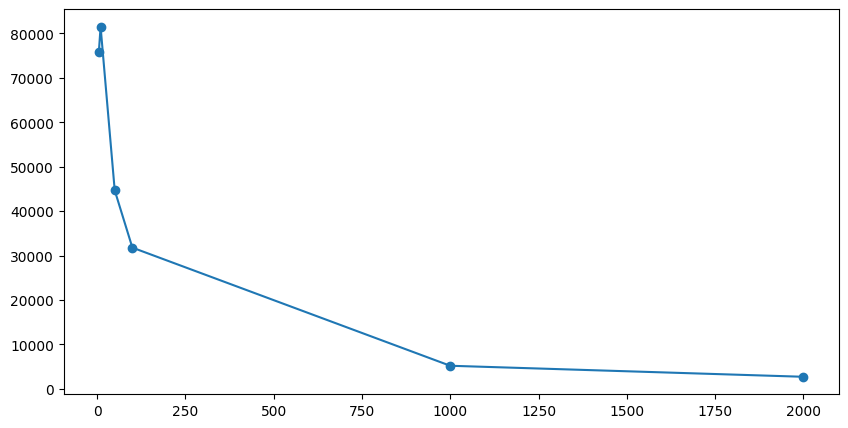

In [13]:
# Plot Number of eigenvectors vs Mean Square Error 

plt.figure(figsize=(10, 5))
plt.plot(dim_x, mse_values , marker='o')
plt.show()


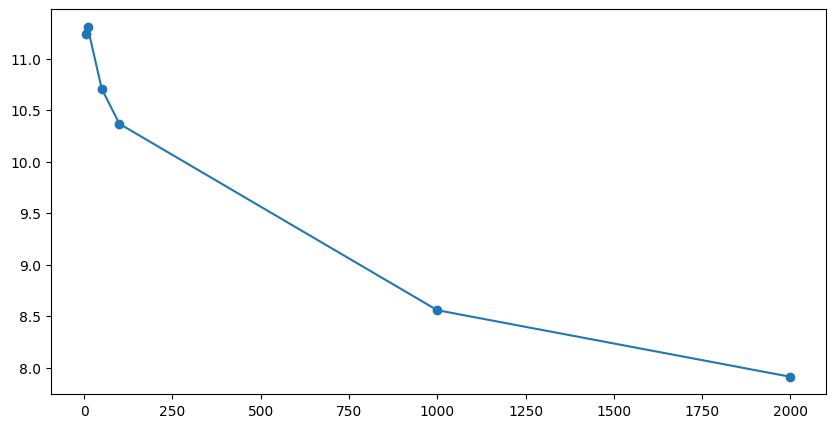

In [14]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.figure(figsize=(10, 5))
plt.plot(dim_x, mse_log_values , marker='o')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:**

Increasing the number of dimensions used in PCA can improve accuracy up to a certain point. This is because increasing the number of dimensions allows for more of the variance in the data to be explained, which can lead to better representations of the data.

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

***Answer:***

**`Advantages`**

*1. Dimensionality reduction:* PCA is primarily used to reduce the dimensionality of a dataset by finding a smaller set of variables that can explain most of the variance in the original dataset. This helps to simplify the data and makes it easier to analyze and visualize.

*2. Feature extraction:* PCA can be used to extract the most important features from a dataset, which can be useful in machine learning and pattern recognition applications.

*3. Data visualization:* PCA can be used to create visualizations of complex data that can be easily interpreted and understood.

**`Limitations`**

*1. Information loss:* PCA works by discarding information that is deemed less important. This can result in the loss of some information that could be useful in certain applications.

*2. Linearity assumption:* PCA assumes that the relationships between variables are linear. In cases where this assumption does not hold, PCA may not be appropriate.

**`Limitations in context of face recognition:`**

*1. Face recognition requires high dimensional data:* PCA works best when the data has a high signal-to-noise ratio and when there is a clear separation between the different classes. In the case of face recognition, however, the data is often high-dimensional and noisy, which can make it difficult to apply PCA effectively.

*2. Non-linear relationships:* The relationship between facial features may not be linear, which can make it difficult to use PCA effectively.

*3. Limited performance with large datasets:* PCA can become computationally expensive when working with large datasets. This can limit its effectiveness in face recognition applications where large datasets are common.